## Importing packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

## Loading Data into a dataframe

In [45]:
df = pd.read_csv('data/loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Cleanup
### Filtering out current ongoing loans

In [46]:
df = df[df.loan_status !='Current']

Overview of Dataframe

In [47]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,36191,37544,38577,38577,38577,38577,38577,38577,38577,26050,38577,38566,38577,38577,38577,38577,38577,38577,13672,2740,38577,38577,38577,38527,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38506,38577,0,38575,38521,0,38577,38577,0,0,0,38577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38521,38577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37880,38538,0,0,0,0
unique,38577,38577,870,1019,8050,2,370,15022,7,35,28027,11,5,5215,3,55,2,1,38577,25803,14,19297,822,50,2853,11,524,9,95,111,40,5,21275,1088,82,1,1,1,36714,36387,6841,34025,1320,4040,2616,101,34418,0,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,A4,US Army,10+ years,RENT,60000,Not Verified,Nov-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Oct-99,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,Mar-13,0,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2809,2719,1294,29096,913,68,11675,2873,131,8488,18480,1466,16694,2062,32950,38577,1,209,18055,2090,583,6949,178,34386,360,18709,443,670,3909,36507,972,954,1424,38577,38577,38577,26,165,2293,71,36582,34359,34795,1026,74,NaN,9333,38521,NaN,38577,38577,NaN,NaN,NaN,38577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38521,38577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36238,38538,NaN,NaN,NaN,NaN


### Get the missing Percentage of all columns

In [48]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [49]:
pd.set_option('display.max_rows', None)
missing_value_df.head(120)

,column_name,percent_missing
id,id,0.000000
earliest_cr_line,earliest_cr_line,0.000000
inq_last_6mths,inq_last_6mths,0.000000
open_acc,open_acc,0.000000
pub_rec,pub_rec,0.000000
revol_bal,revol_bal,0.000000
total_acc,total_acc,0.000000
initial_list_status,initial_list_status,0.000000
out_prncp,out_prncp,0.000000
out_prncp_inv,out_prncp_inv,0.000000


#### Insights from above
1. A lot of features are almost always missing and hence can be dropped.

### Remove All Columns With Over 50% Missing Values

In [50]:
not_null_columns = missing_value_df[percent_missing > 50]['column_name']

<ipython-input-50-f0aeb9ea09e9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_null_columns = missing_value_df[percent_missing > 50]['column_name']


In [51]:
not_null_columns.head(100)

mths_since_last_delinq                    mths_since_last_delinq
mths_since_last_record                    mths_since_last_record
mo_sin_rcnt_tl                                    mo_sin_rcnt_tl
mort_acc                                                mort_acc
mths_since_recent_bc                        mths_since_recent_bc
mths_since_recent_bc_dlq                mths_since_recent_bc_dlq
mths_since_recent_inq                      mths_since_recent_inq
mths_since_recent_revol_delinq    mths_since_recent_revol_delinq
num_accts_ever_120_pd                      num_accts_ever_120_pd
num_actv_bc_tl                                    num_actv_bc_tl
num_actv_rev_tl                                  num_actv_rev_tl
num_bc_sats                                          num_bc_sats
num_bc_tl                                              num_bc_tl
num_tl_op_past_12m                            num_tl_op_past_12m
num_op_rev_tl                                      num_op_rev_tl
num_rev_accts            

In [52]:
not_null_df = df.drop(not_null_columns, axis=1)

In [53]:
not_null_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,36191,37544,38577,38577,38577,38577,38577,38577,38577,26050,38577,38566,38577,38577,38577,38577,38577,38577,38577,38577,38577,38527,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38506,38577,38575,38521,38577,38577,38577,38521,38577,37880,38538
unique,38577,38577,870,1019,8050,2,370,15022,7,35,28027,11,5,5215,3,55,2,1,38577,25803,14,19297,822,50,2853,11,524,9,40,5,21275,1088,82,1,1,1,36714,36387,6841,34025,1320,4040,2616,101,34418,106,1,1,1,1,1,1,3,1
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,A4,US Army,10+ years,RENT,60000,Not Verified,Nov-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Oct-99,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,Mar-13,0,May-16,0,1,INDIVIDUAL,0,0,0,0,0
freq,1,1,2809,2719,1294,29096,913,68,11675,2873,131,8488,18480,1466,16694,2062,32950,38577,1,209,18055,2090,583,6949,178,34386,360,18709,3909,36507,972,954,1424,38577,38577,38577,26,165,2293,71,36582,34359,34795,1026,74,9333,38521,38577,38577,38577,38521,38577,36238,38538


## Check Unique Values for categorical Columns

In [54]:
df_unique = not_null_df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [55]:
df_unique.head(100)

,Variable,DistinctCount
0,id,38577
1,member_id,38577
2,loan_amnt,870
3,funded_amnt,1019
4,funded_amnt_inv,8050
5,term,2
6,int_rate,370
7,installment,15022
8,grade,7
9,sub_grade,35


#### Insights from above
1. A lot of columns almost always have unique values and hence can be dropped.

## Remove All Columns with just a single Value

In [56]:
single_value_columns = df_unique[df_unique['DistinctCount'] < 2]['Variable']

In [57]:
single_value_columns.head(100)

17                    pymnt_plan
33           initial_list_status
34                     out_prncp
35                 out_prncp_inv
46    collections_12_mths_ex_med
47                   policy_code
48              application_type
49                acc_now_delinq
50      chargeoff_within_12_mths
51                   delinq_amnt
53                     tax_liens
Name: Variable, dtype: object

#### Insights from above
1. A lot of features are having a single value, hence can be dropped.

In [58]:
unique_df = not_null_df.drop(single_value_columns, axis=1)

In [59]:
pd.set_option('display.max_columns', None)
unique_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,36191,37544,38577,38577,38577,38577,38577,38577,26050,38577,38566,38577,38577,38577,38577,38577,38577,38577,38577,38577,38527,38577,38577,38577,38577,38577,38577,38577,38577,38506,38577,38575,37880
unique,38577,38577,870,1019,8050,2,370,15022,7,35,28027,11,5,5215,3,55,2,38577,25803,14,19297,822,50,2853,11,524,9,40,5,21275,1088,82,36714,36387,6841,34025,1320,4040,2616,101,34418,106,3
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,A4,US Army,10+ years,RENT,60000,Not Verified,Nov-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Oct-99,0,7,0,0,0%,16,11196.56943,0,10000,0,0,0,0,Mar-13,0,May-16,0
freq,1,1,2809,2719,1294,29096,913,68,11675,2873,131,8488,18480,1466,16694,2062,32950,1,209,18055,2090,583,6949,178,34386,360,18709,3909,36507,972,954,1424,26,165,2293,71,36582,34359,34795,1026,74,9333,36238


In [60]:
unique_df.shape

(38577, 43)

## Remove All columns with dictinct values for all columns

In [61]:
all_unique_columns = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']
clean_df = unique_df.drop(all_unique_columns, axis=1)

In [62]:
clean_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
count,38577,38577,38577,38577,38577,38577,38577,38577,37544,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38577,38527,38577,38577,38577,38577,38577,38577,38577,38577,38506,38577,38575,37880
unique,870,1019,8050,2,370,15022,7,35,11,5,5215,3,55,2,14,50,2853,11,524,9,40,5,21275,1088,82,36714,36387,6841,34025,1320,4040,2616,101,34418,106,3
top,10000,10000,5000,36 months,10.99%,311.11,B,A4,10+ years,RENT,60000,Not Verified,Nov-11,Fully Paid,debt_consolidation,CA,0,0,Oct-99,0,7,0,0,0%,16,11196.56943,0,10000,0,0,0,0,Mar-13,0,May-16,0
freq,2809,2719,1294,29096,913,68,11675,2873,8488,18480,1466,16694,2062,32950,18055,6949,178,34386,360,18709,3909,36507,972,954,1424,26,165,2293,71,36582,34359,34795,1026,74,9333,36238


In [63]:
clean_df.shape

(38577, 36)

## Deriving Metrics from base columns

In [64]:
clean_df['term'] = clean_df['term'].str.rstrip('months')
clean_df['int_rate'] = clean_df['int_rate'].str.rstrip('%')
clean_df['emp_length'] = clean_df['emp_length'].str.rstrip('years ')
clean_df['emp_length'].replace({'10+': '10'}, inplace=True)
clean_df['emp_length'][clean_df['emp_length'] == '< 1'] = '0.5'
clean_df['revol_util'] = clean_df['revol_util'].str.rstrip('%')
clean_df['issue_month'], clean_df['issue_year'] = clean_df[
    'issue_d'].str.split('-').str
clean_df['last_credit_pull_month'], clean_df['last_credit_pull_year'] = clean_df[
    'last_credit_pull_d'].str.split('-').str
clean_df['last_payment_month'], clean_df['last_payment_year'] = clean_df[
    'last_pymnt_d'].str.split('-').str
clean_df['earliest_cr_line_month'], clean_df['earliest_cr_line_year'] = clean_df[
    'earliest_cr_line'].str.split('-').str

del clean_df['issue_d']
del clean_df['last_credit_pull_d']
del clean_df['last_pymnt_d']
del clean_df['earliest_cr_line']

<ipython-input-64-9885eccd81e5>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_df['issue_month'], clean_df['issue_year'] = clean_df[
<ipython-input-64-9885eccd81e5>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_df['last_credit_pull_month'], clean_df['last_credit_pull_year'] = clean_df[
<ipython-input-64-9885eccd81e5>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_df['last_payment_month'], clean_df['last_payment_year'] = clean_df[
<ipython-input-64-9885eccd81e5>:13: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  clean_df['earliest_cr_line_month'], clean_df['earliest_cr_line_year'] = clean_df[


In [65]:
clean_df.shape

(38577, 40)

In [66]:
converted_df = clean_df.apply(pd.to_numeric, errors='ignore')
converted_df.convert_dtypes()
converted_df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries          

## Univariate Analysis

In [67]:
numerical_columns = converted_df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = converted_df.select_dtypes(exclude=np.number).columns.tolist()
print(numerical_columns)
print(categorical_columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'issue_year', 'last_credit_pull_year', 'last_payment_year', 'earliest_cr_line_year']
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'issue_month', 'last_credit_pull_month', 'last_payment_month', 'earliest_cr_line_month']


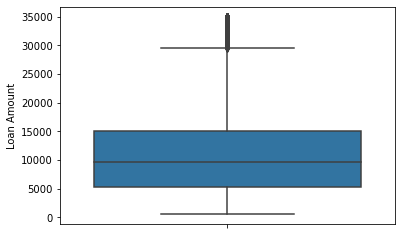

In [73]:
sns.boxplot( y=converted_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

#### Insights from above
1. The loan amount varies from 0 to 35,000 having mean of 10,000

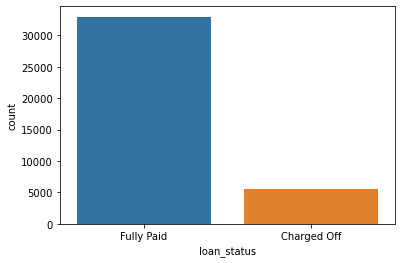

In [74]:
sns.countplot(x= converted_df["loan_status"])
plt.show()

#### Insights from above
1. 86% loans are fully paid while only 14% are defaulted.
2. There are class imbalances present.

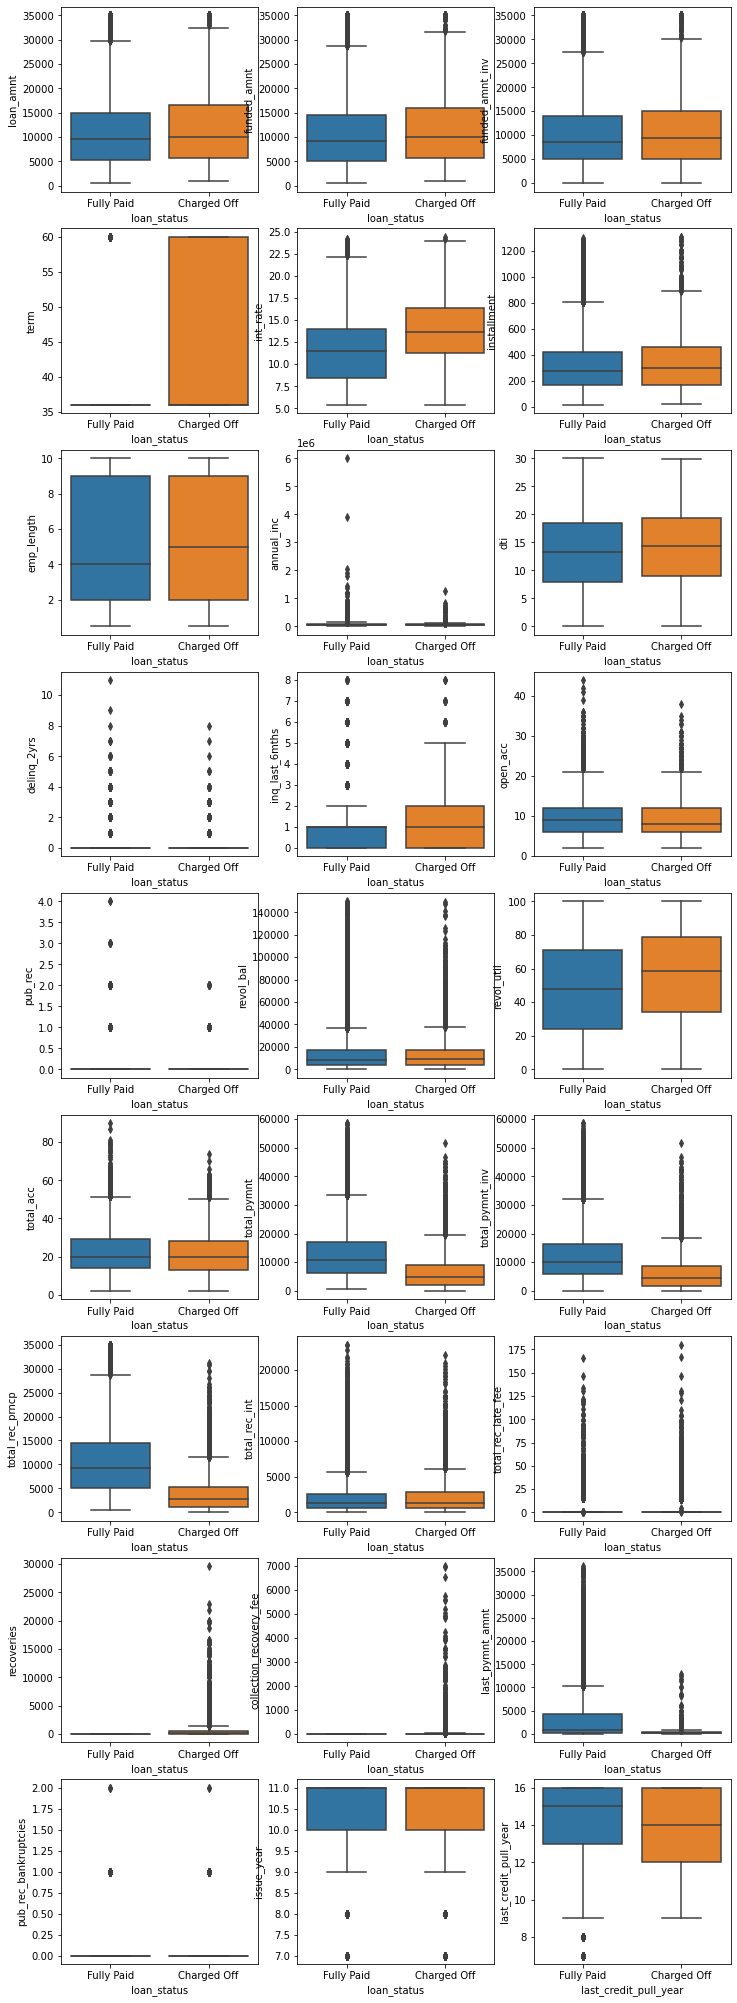

In [68]:
fig, axes = plt.subplots(len(numerical_columns)//3, 3, figsize=(12, 36))

i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(y=numerical_columns[i], x='loan_status', data=converted_df, ax=axis)
        plt.xlabel(numerical_columns[i])
        i = i+1

#### Insights from above
1. Charged Off Loans have slighly higher loan amounts.
2. Higher Installments have significantly higher chances of being charged off.
3. total_payment_inv, total_recv_principal is higher for fully paid vs charged off.

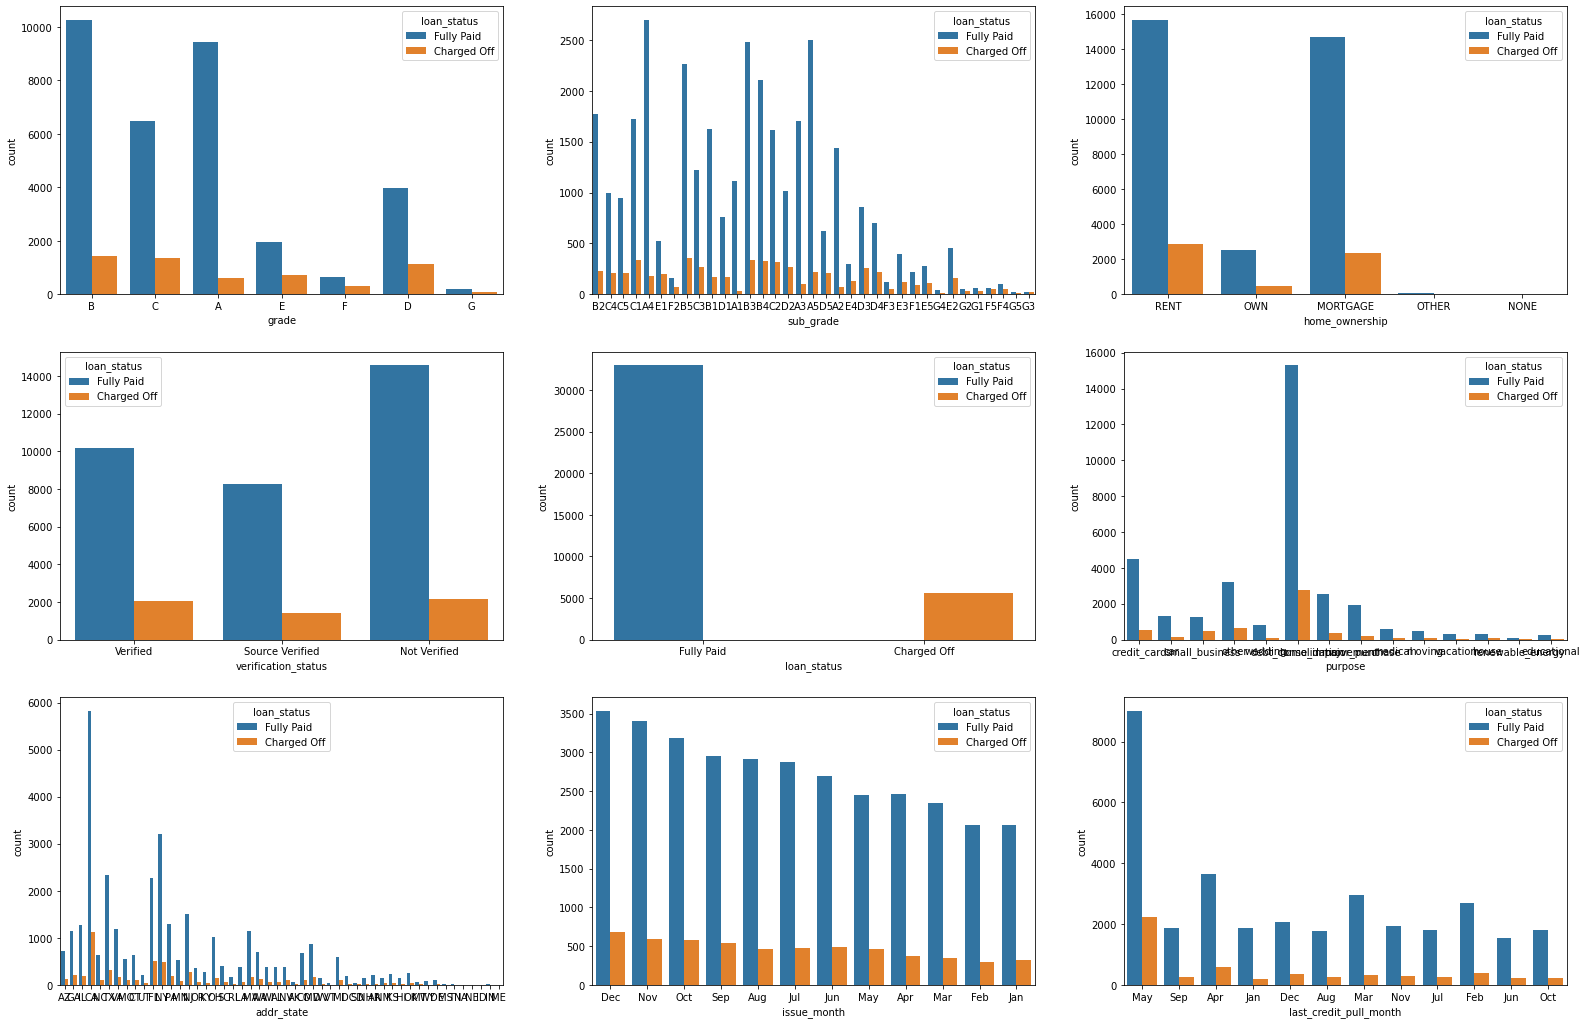

In [69]:
fig, axes = plt.subplots(len(categorical_columns)//3, 3, figsize=(27, 18))

i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.countplot(x=categorical_columns[i], hue='loan_status', data=converted_df, ax=axis)
        plt.xlabel(categorical_columns[i])
        i = i+1

#### Insights from above
1. Most loans are of class A,B and C. D has highest charged off to paid ratio followed by E, C, B and A.
2. Most loand are for category RENT, OWN, MORTGAGE. RENT and MORTGAGE have higher charged off to paid ratio compared to OWN.
3. CA has highest loan applications and subsequently highest fully paid, defaulters.

## Bivariate Analysis

<AxesSubplot:>

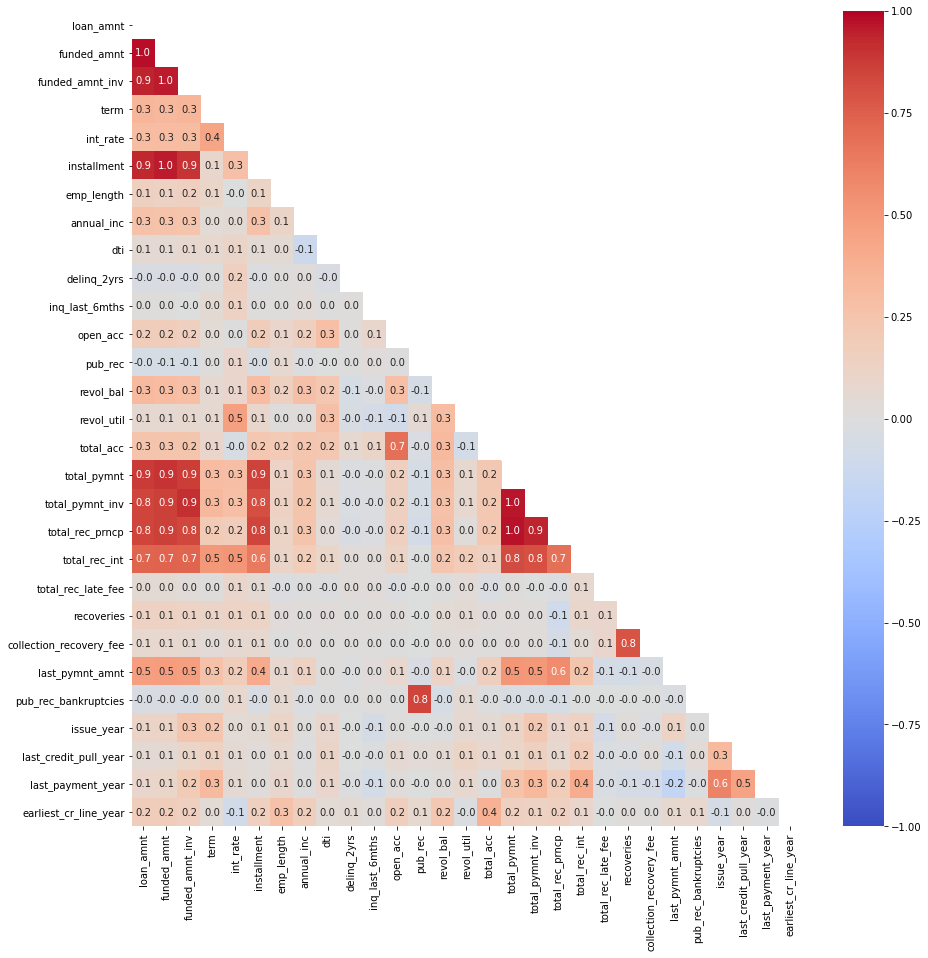

In [72]:
# Heatmap of Correlation in raw features
matrix = np.triu(converted_df.corr())
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(converted_df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

#### Insights from above
1. A few features have very high correlation almost 1, so they can be merged into a single feature.